In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


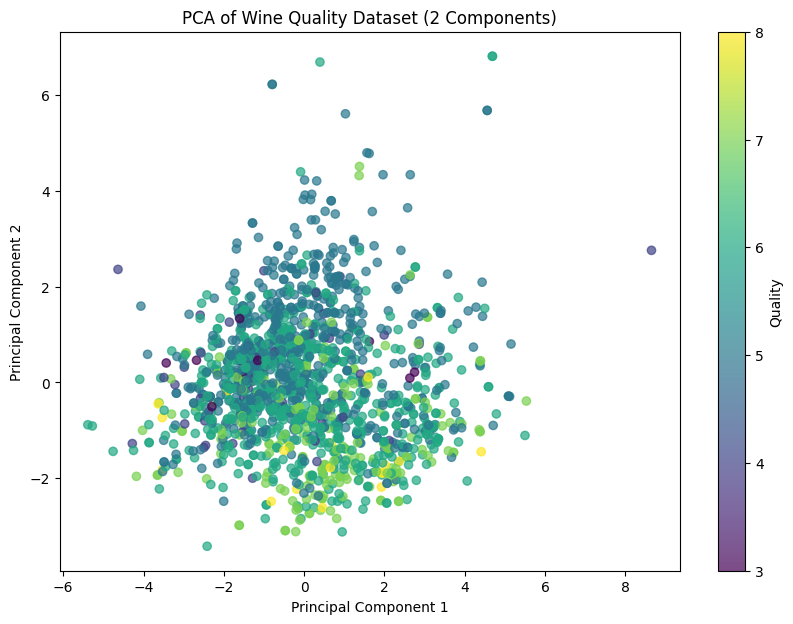

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Colab Notebooks/winequality-red.csv'
wine_data = pd.read_csv(file_path)

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Quality Dataset (2 Components)')
plt.show()


In [3]:
X = wine_data.drop('quality', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"주성분 {i}: {ratio:.4f} (분산 비율)")

주성분 1: 0.2817 (분산 비율)
주성분 2: 0.1751 (분산 비율)
주성분 3: 0.1410 (분산 비율)
주성분 4: 0.1103 (분산 비율)
주성분 5: 0.0872 (분산 비율)
주성분 6: 0.0600 (분산 비율)
주성분 7: 0.0531 (분산 비율)
주성분 8: 0.0385 (분산 비율)
주성분 9: 0.0313 (분산 비율)
주성분 10: 0.0165 (분산 비율)
주성분 11: 0.0054 (분산 비율)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
n_components_95 = next(i + 1 for i, ratio in enumerate(cumulative_variance_ratio) if ratio >= 0.95)
print(f"95% 이상의 분산을 설명하기 위한 최소 주성분 개수: {n_components_95}")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def evaluate_knn_with_pca(X_train, X_test, y_train, y_test, n_neighbors=5):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return accuracy_score(y_test, knn.predict(X_test))

accuracy_before_pca = evaluate_knn_with_pca(X_train, X_test, y_train, y_test, n_neighbors=5)
print(f"PCA 적용 전 KNN 모델의 정확도 (n_neighbors=5): {accuracy_before_pca:.4f}")

pca = PCA(n_components=n_components_95)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

accuracy_after_pca = evaluate_knn_with_pca(X_train_pca, X_test_pca, y_train, y_test, n_neighbors=5)
print(f"PCA 적용 후 KNN 모델의 정확도 (n_neighbors=5): {accuracy_after_pca:.4f}")

95% 이상의 분산을 설명하기 위한 최소 주성분 개수: 9
PCA 적용 전 KNN 모델의 정확도 (n_neighbors=5): 0.5531
PCA 적용 후 KNN 모델의 정확도 (n_neighbors=5): 0.5531
